In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Parameters
N = 10  # Number of nodes
T = 1000  # Number of data points per node

load_data_params = {
    'node_load_mean_mean': 50.0,
    'node_load_mean_var': 10.0,
    'node_load_iid_var': 5.0,
    'node_load_ar1_theta': 0.9
}

latency_params = {
    'node_latency_mean_mean': 30.0,
    'node_latency_mean_var': 10.0,
    'node_latency_ar1_theta': 0.9
}

# Generate mean values for load and latency for N nodes
node_load_means = np.random.normal(load_data_params['node_load_mean_mean'],
                                   np.sqrt(load_data_params['node_load_mean_var']), N)
node_latency_means = np.random.normal(latency_params['node_latency_mean_mean'],
                                      np.sqrt(latency_params['node_latency_mean_var']), N)

# Initialize matrices to store load and latency data
load_data = np.zeros((N, T))
latency_data = np.zeros((N, T))

# Generate IID and AR1 data for load and latency
for i in range(N):
    # Generate IID data for load
    load_iid = np.random.normal(node_load_means[i], np.sqrt(load_data_params['node_load_iid_var']), T)
    load_ar1 = np.zeros(T)
    load_ar1[0] = node_load_means[i]
    for t in range(1, T):
        load_ar1[t] = load_data_params['node_load_ar1_theta'] * load_ar1[t-1] + \
                      (1 - load_data_params['node_load_ar1_theta']) * load_iid[t]

    load_data[i, :] = load_ar1

    # Generate IID data for latency
    latency_iid = np.random.exponential(node_latency_means[i], T)
    latency_ar1 = np.zeros(T)
    latency_ar1[0] = node_latency_means[i]
    for t in range(1, T):
        latency_ar1[t] = latency_params['node_latency_ar1_theta'] * latency_ar1[t-1] + \
                         (1 - latency_params['node_latency_ar1_theta']) * latency_iid[t]

    latency_data[i, :] = latency_ar1

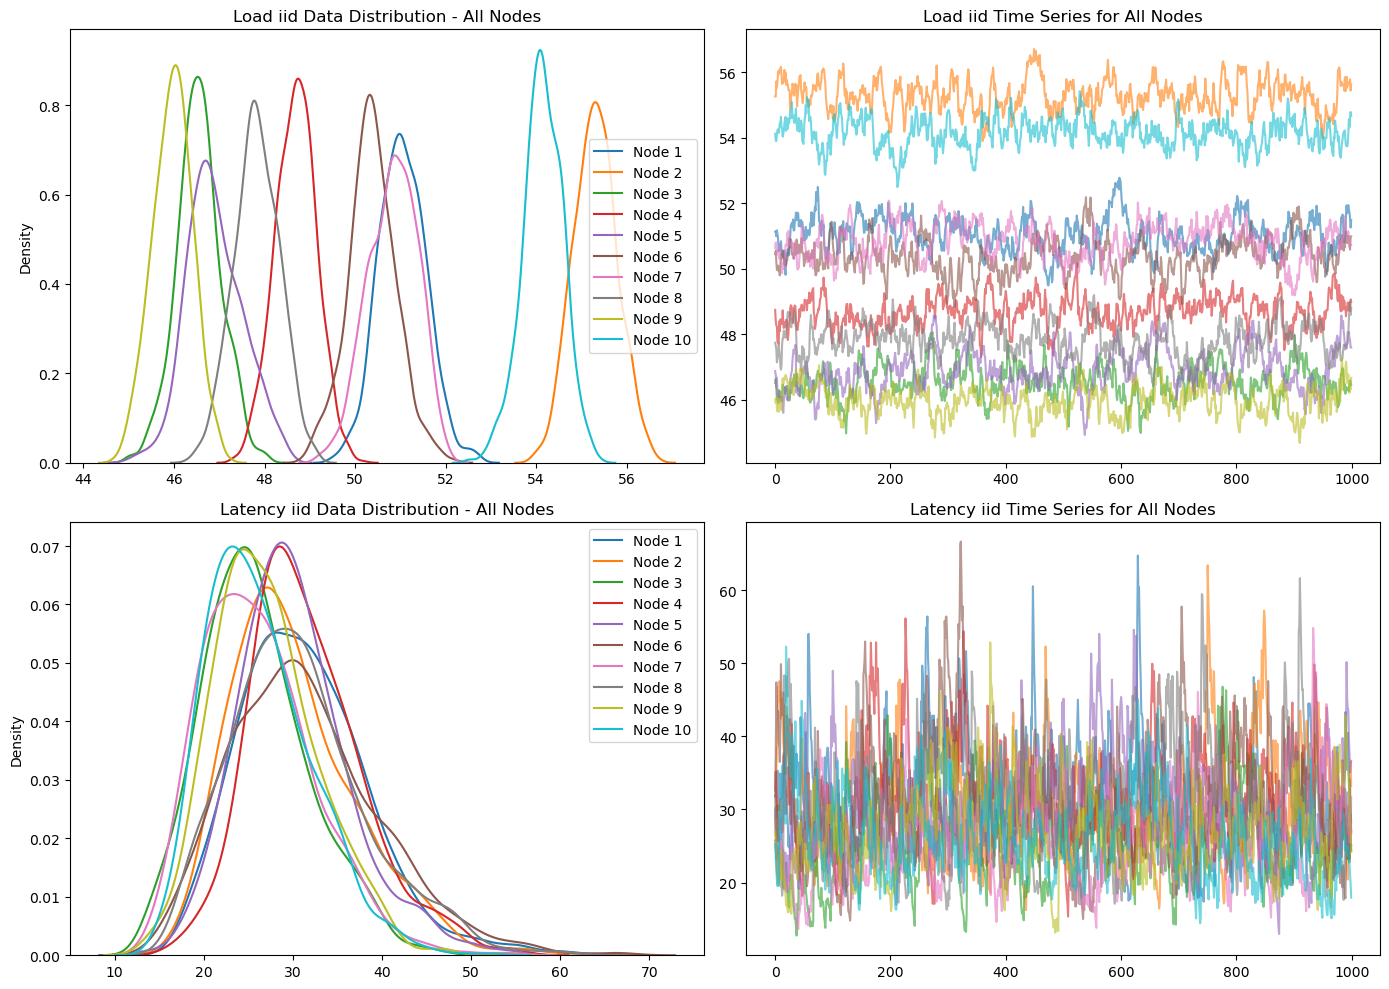

In [13]:
# Plot Figure 1
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# KDE plot for each node's load data
for i in range(N):
    sns.kdeplot(load_data[i], ax=axs[0, 0], label=f'Node {i+1}')
axs[0, 0].set_title("Load iid Data Distribution - All Nodes")
axs[0, 0].legend()

# Time series plot of load for all nodes
axs[0, 1].plot(load_data.T, alpha=0.6)
axs[0, 1].set_title("Load iid Time Series for All Nodes")

# KDE plot for each node's latency data
for i in range(N):
    sns.kdeplot(latency_data[i], ax=axs[1, 0], label=f'Node {i+1}')
axs[1, 0].set_title("Latency iid Data Distribution - All Nodes")
axs[1, 0].legend()

# Time series plot of latency for all nodes
axs[1, 1].plot(latency_data.T, alpha=0.6)
axs[1, 1].set_title("Latency iid Time Series for All Nodes")

plt.tight_layout()
plt.savefig('Figure_1.png')
plt.show()

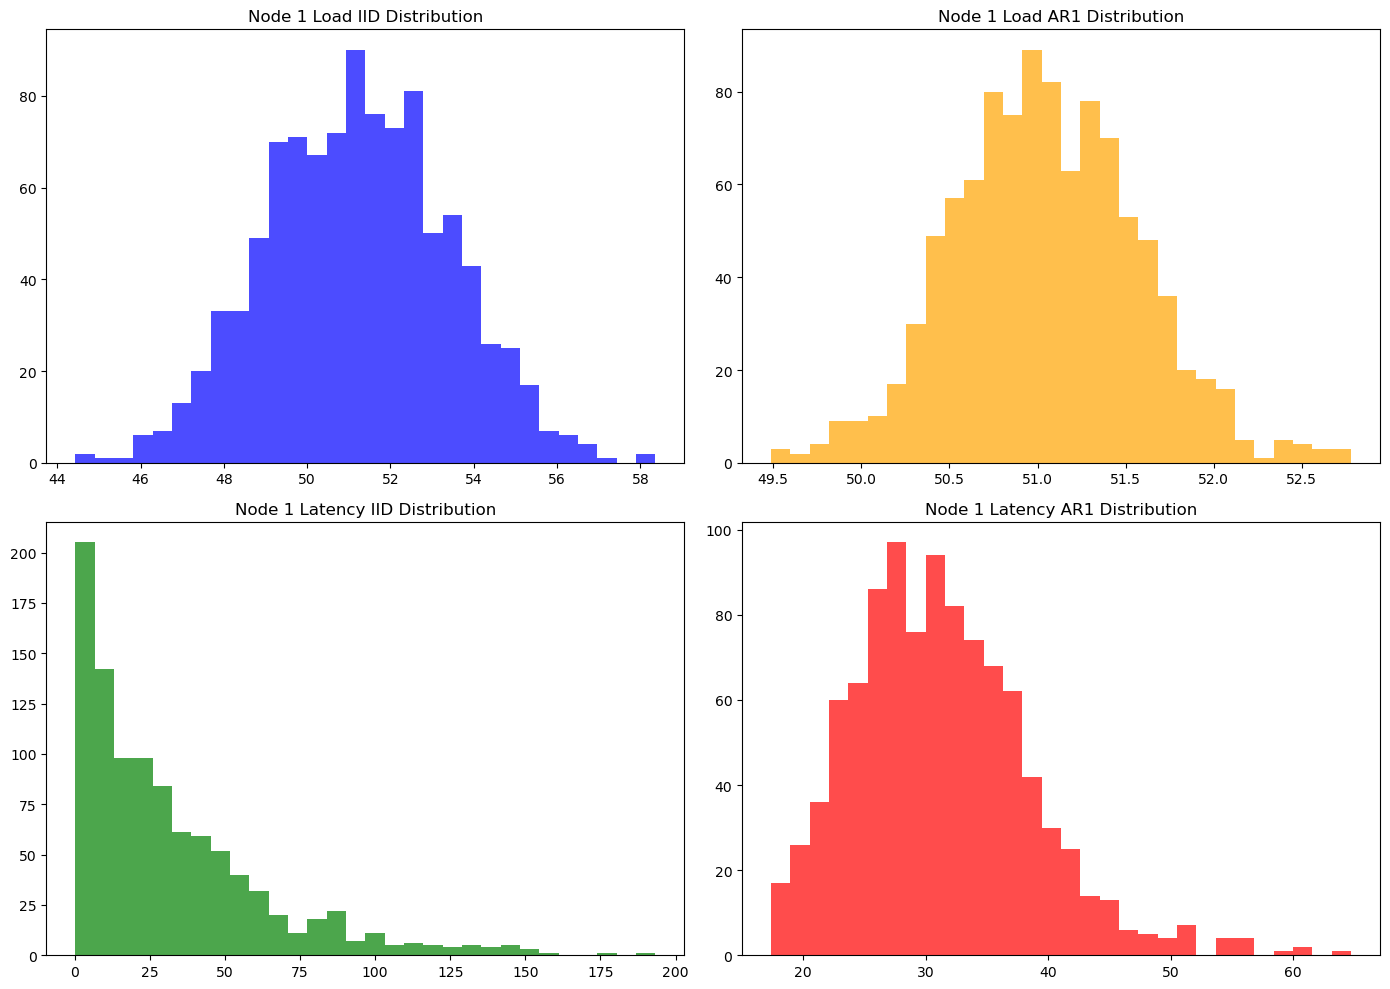

In [12]:
# Function to plot data for an individual node
def plot_individual_node(i):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Histogram of IID data for load
    load_iid = np.random.normal(node_load_means[i], np.sqrt(load_data_params['node_load_iid_var']), T)
    axs[0, 0].hist(load_iid, bins=30, color='blue', alpha=0.7)
    axs[0, 0].set_title(f"Node {i+1} Load IID Distribution")

    # Histogram of AR1 data for load
    axs[0, 1].hist(load_data[i], bins=30, color='orange', alpha=0.7)
    axs[0, 1].set_title(f"Node {i+1} Load AR1 Distribution")

    # Histogram of IID data for latency
    latency_iid = np.random.exponential(node_latency_means[i], T)
    axs[1, 0].hist(latency_iid, bins=30, color='green', alpha=0.7)
    axs[1, 0].set_title(f"Node {i+1} Latency IID Distribution")

    # Histogram of AR1 data for latency
    axs[1, 1].hist(latency_data[i], bins=30, color='red', alpha=0.7)
    axs[1, 1].set_title(f"Node {i+1} Latency AR1 Distribution")

    plt.tight_layout()
    plt.savefig(f'Figure_2_node_{i}')
    plt.show()

# Example: Plot data for the first node
plot_individual_node(0)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
N = 10  # Number of nodes
T = 1000  # Number of data points per node

load_data_params = {
    'node_load_mean_mean': 50.0,
    'node_load_mean_var': 10.0,
    'node_load_iid_var': 5.0,
    'node_load_ar1_theta': 0.9
}

latency_params = {
    'node_latency_mean_mean': 30.0,
    'node_latency_mean_var': 10.0,
    'node_latency_ar1_theta': 0.9
}

# Generate mean values for load and latency for N nodes
node_load_means = np.random.normal(load_data_params['node_load_mean_mean'],
                                   np.sqrt(load_data_params['node_load_mean_var']), N)
node_latency_means = np.random.normal(latency_params['node_latency_mean_mean'],
                                      np.sqrt(latency_params['node_latency_mean_var']), N)

# Initialize matrices to store load and latency data
load_data_iid = np.zeros((N, T))
latency_data_iid = np.zeros((N, T))

load_data_ar1 = np.zeros((N, T))
latency_data_ar1 = np.zeros((N, T))

# Generate IID and AR1 data for load and latency
for i in range(N):
    # Generate IID data for load
    load_iid = np.random.normal(node_load_means[i], np.sqrt(load_data_params['node_load_iid_var']), T)
    load_data_iid[i, :] = load_iid

    # Generate AR1 data for load
    load_ar1 = np.zeros(T)
    load_ar1[0] = node_load_means[i]
    for t in range(1, T):
        load_ar1[t] = load_data_params['node_load_ar1_theta'] * load_ar1[t-1] + \
                      (1 - load_data_params['node_load_ar1_theta']) * load_iid[t]
    load_data_ar1[i, :] = load_ar1

    # Generate IID data for latency
    latency_iid = np.random.exponential(node_latency_means[i], T)
    latency_data_iid[i, :] = latency_iid

    # Generate AR1 data for latency
    latency_ar1 = np.zeros(T)
    latency_ar1[0] = node_latency_means[i]
    for t in range(1, T):
        latency_ar1[t] = latency_params['node_latency_ar1_theta'] * latency_ar1[t-1] + \
                         (1 - latency_params['node_latency_ar1_theta']) * latency_iid[t]
    latency_data_ar1[i, :] = latency_ar1

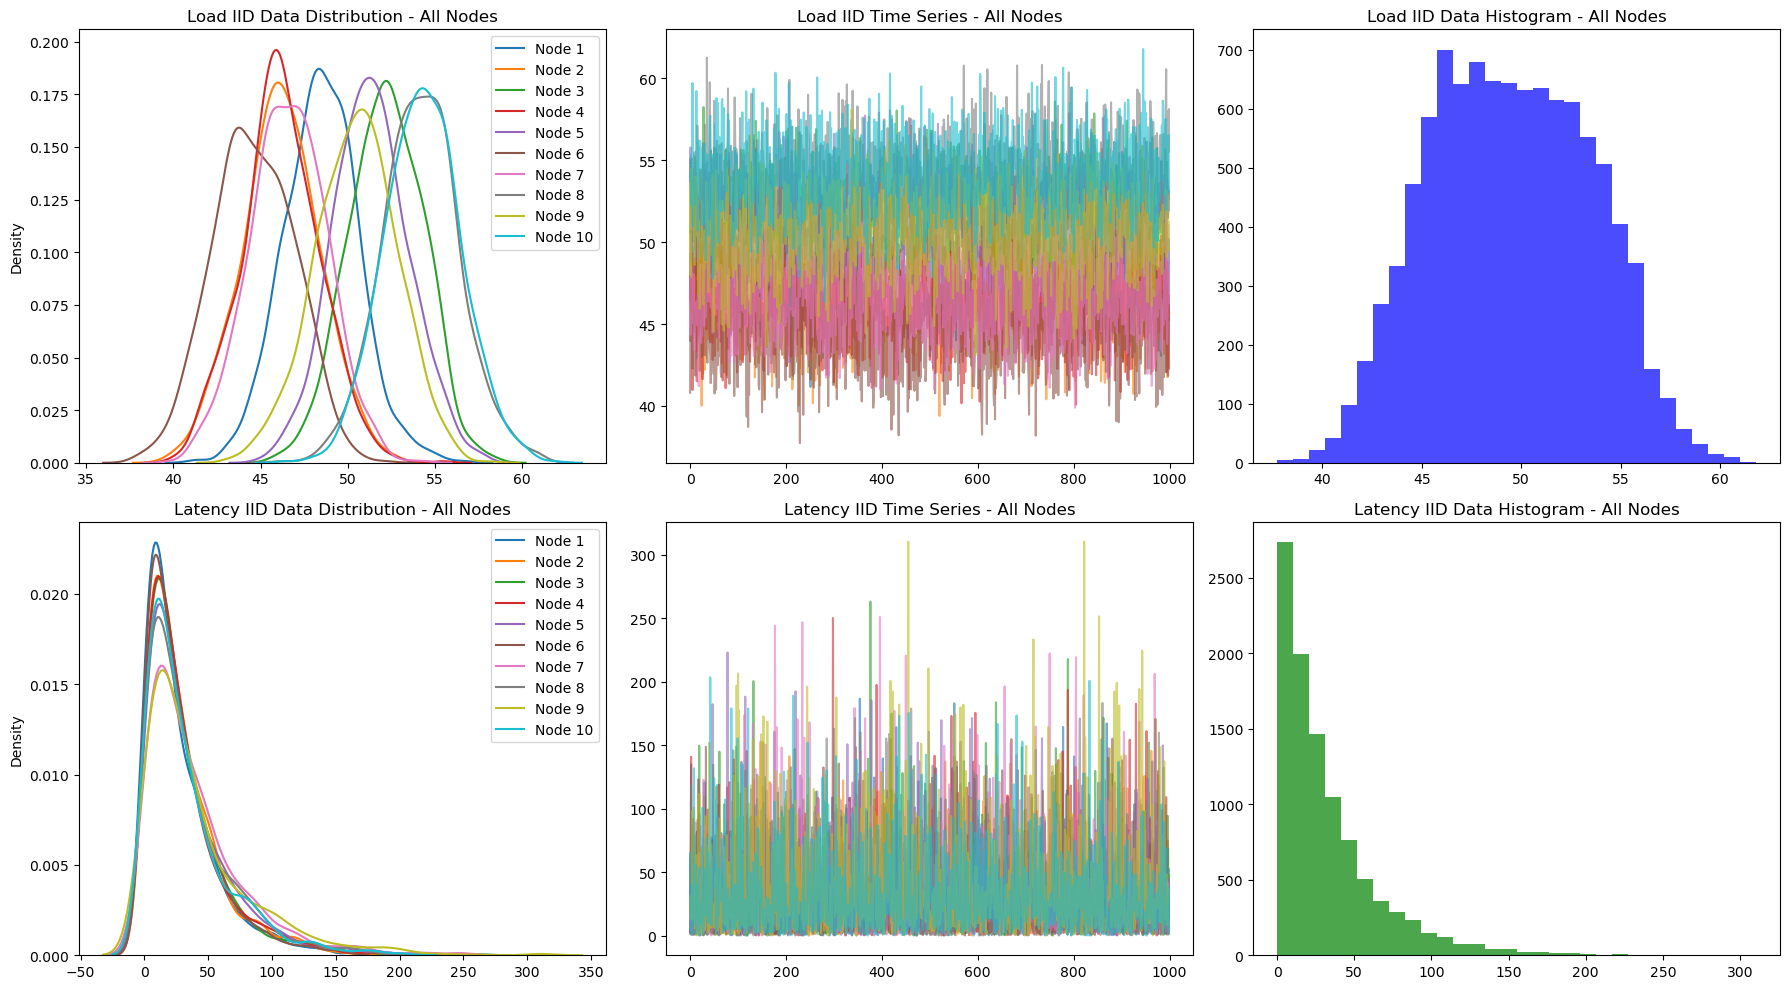

In [15]:
# Updated Figure 1: IID Data with KDE plots and histograms
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# KDE plot for each node's load data
for i in range(N):
    sns.kdeplot(load_data_iid[i], ax=axs[0, 0], label=f'Node {i+1}')
axs[0, 0].set_title("Load IID Data Distribution - All Nodes")
axs[0, 0].legend()

# Time series plot of load for all nodes
axs[0, 1].plot(load_data_iid.T, alpha=0.6)
axs[0, 1].set_title("Load IID Time Series - All Nodes")

# KDE plot for each node's latency data
for i in range(N):
    sns.kdeplot(latency_data_iid[i], ax=axs[1, 0], label=f'Node {i+1}')
axs[1, 0].set_title("Latency IID Data Distribution - All Nodes")
axs[1, 0].legend()

# Time series plot of latency for all nodes
axs[1, 1].plot(latency_data_iid.T, alpha=0.6)
axs[1, 1].set_title("Latency IID Time Series - All Nodes")

# Histogram of IID data for load (right side)
axs[0, 2].hist(load_data_iid.flatten(), bins=30, color='blue', alpha=0.7)
axs[0, 2].set_title("Load IID Data Histogram - All Nodes")

# Histogram of IID data for latency (right side)
axs[1, 2].hist(latency_data_iid.flatten(), bins=30, color='green', alpha=0.7)
axs[1, 2].set_title("Latency IID Data Histogram - All Nodes")

plt.tight_layout()
# plt.savefig('Figure_1_iid.png')
plt.show()

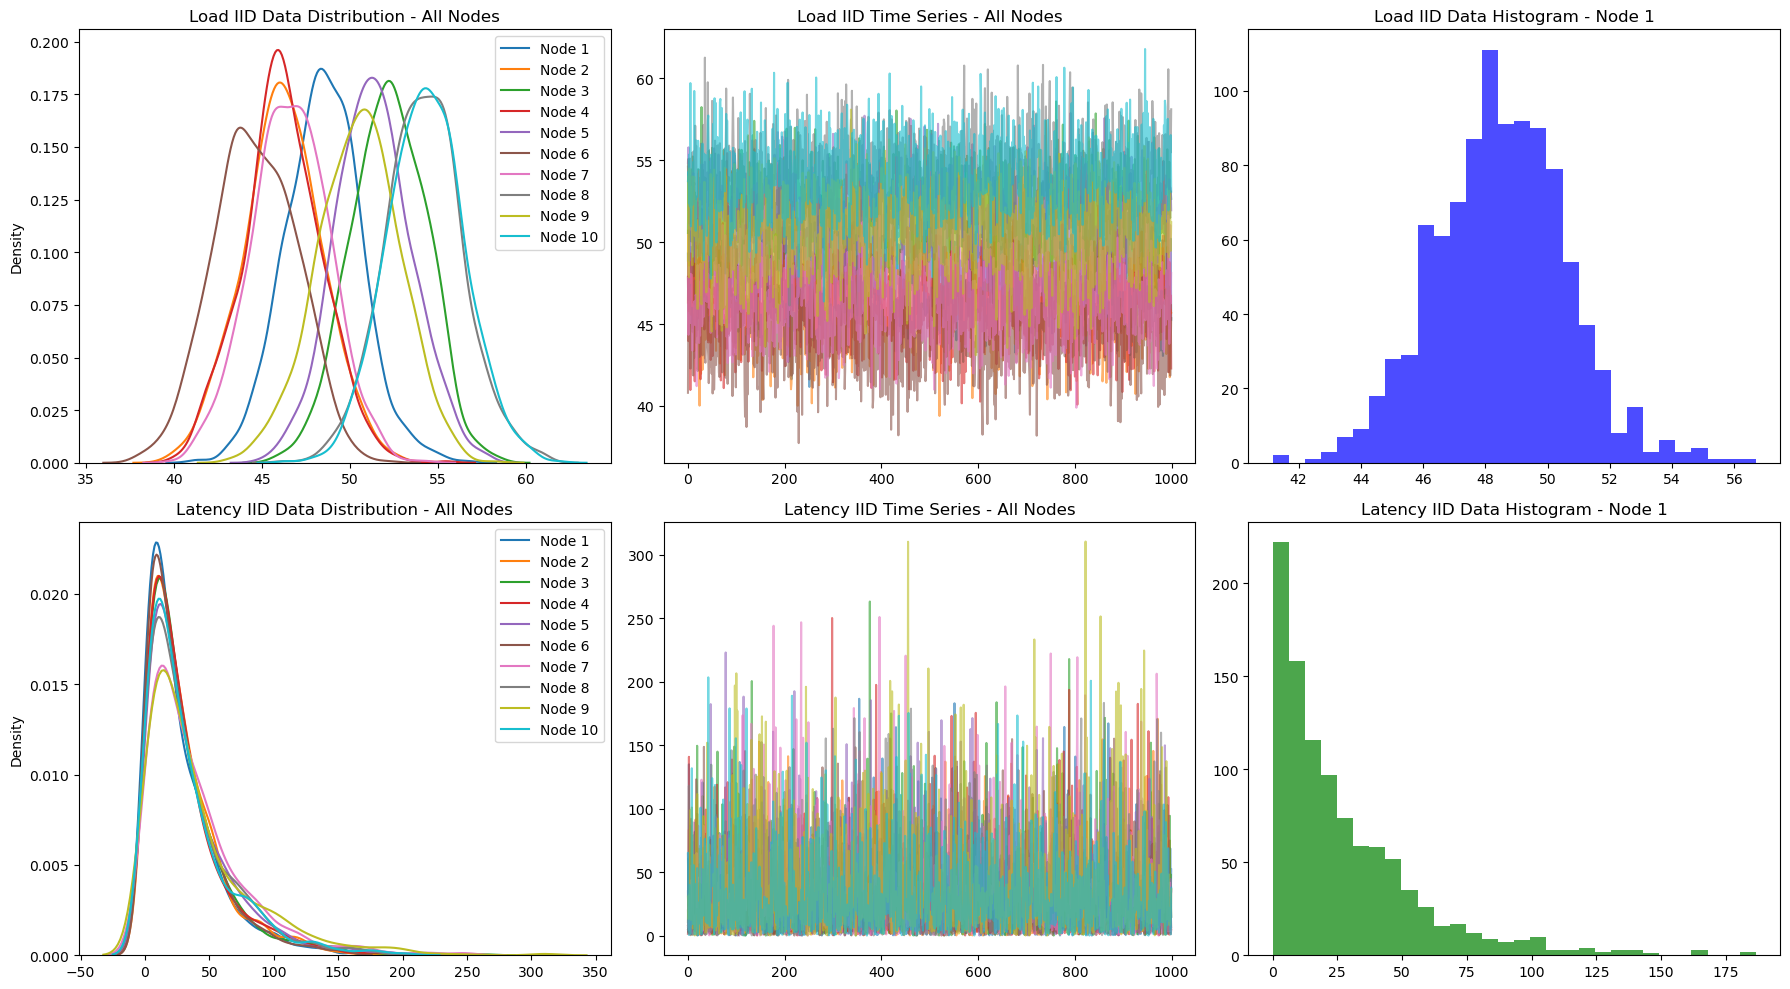

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_iid_data(i, load_data_iid, latency_data_iid, N, T):
    """
    Plots the IID data for load and latency for all nodes, 
    with histograms in the third column only for the i-th node.
    
    Parameters:
    i (int): Index of the node to plot histograms for.
    load_data_iid (ndarray): Array of IID load data for all nodes.
    latency_data_iid (ndarray): Array of IID latency data for all nodes.
    N (int): Number of nodes.
    T (int): Number of data points per node.
    """
    
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))

    # KDE plot for each node's load data
    for node_index in range(N):
        sns.kdeplot(load_data_iid[node_index], ax=axs[0, 0], label=f'Node {node_index+1}')
    axs[0, 0].set_title("Load IID Data Distribution - All Nodes")
    axs[0, 0].legend()

    # Time series plot of load for all nodes
    axs[0, 1].plot(load_data_iid.T, alpha=0.6)
    axs[0, 1].set_title("Load IID Time Series - All Nodes")

    # KDE plot for each node's latency data
    for node_index in range(N):
        sns.kdeplot(latency_data_iid[node_index], ax=axs[1, 0], label=f'Node {node_index+1}')
    axs[1, 0].set_title("Latency IID Data Distribution - All Nodes")
    axs[1, 0].legend()

    # Time series plot of latency for all nodes
    axs[1, 1].plot(latency_data_iid.T, alpha=0.6)
    axs[1, 1].set_title("Latency IID Time Series - All Nodes")

    # Histogram of IID data for load (right side, only for the i-th node)
    axs[0, 2].hist(load_data_iid[i], bins=30, color='blue', alpha=0.7)
    axs[0, 2].set_title(f"Load IID Data Histogram - Node {i+1}")

    # Histogram of IID data for latency (right side, only for the i-th node)
    axs[1, 2].hist(latency_data_iid[i], bins=30, color='green', alpha=0.7)
    axs[1, 2].set_title(f"Latency IID Data Histogram - Node {i+1}")

    plt.tight_layout()
    # plt.savefig(f'Figure_1_iid_node_{i+1}.png')
    plt.show()


plot_iid_data(i=0, load_data_iid=load_data_iid, latency_data_iid=latency_data_iid, N=N, T=T)


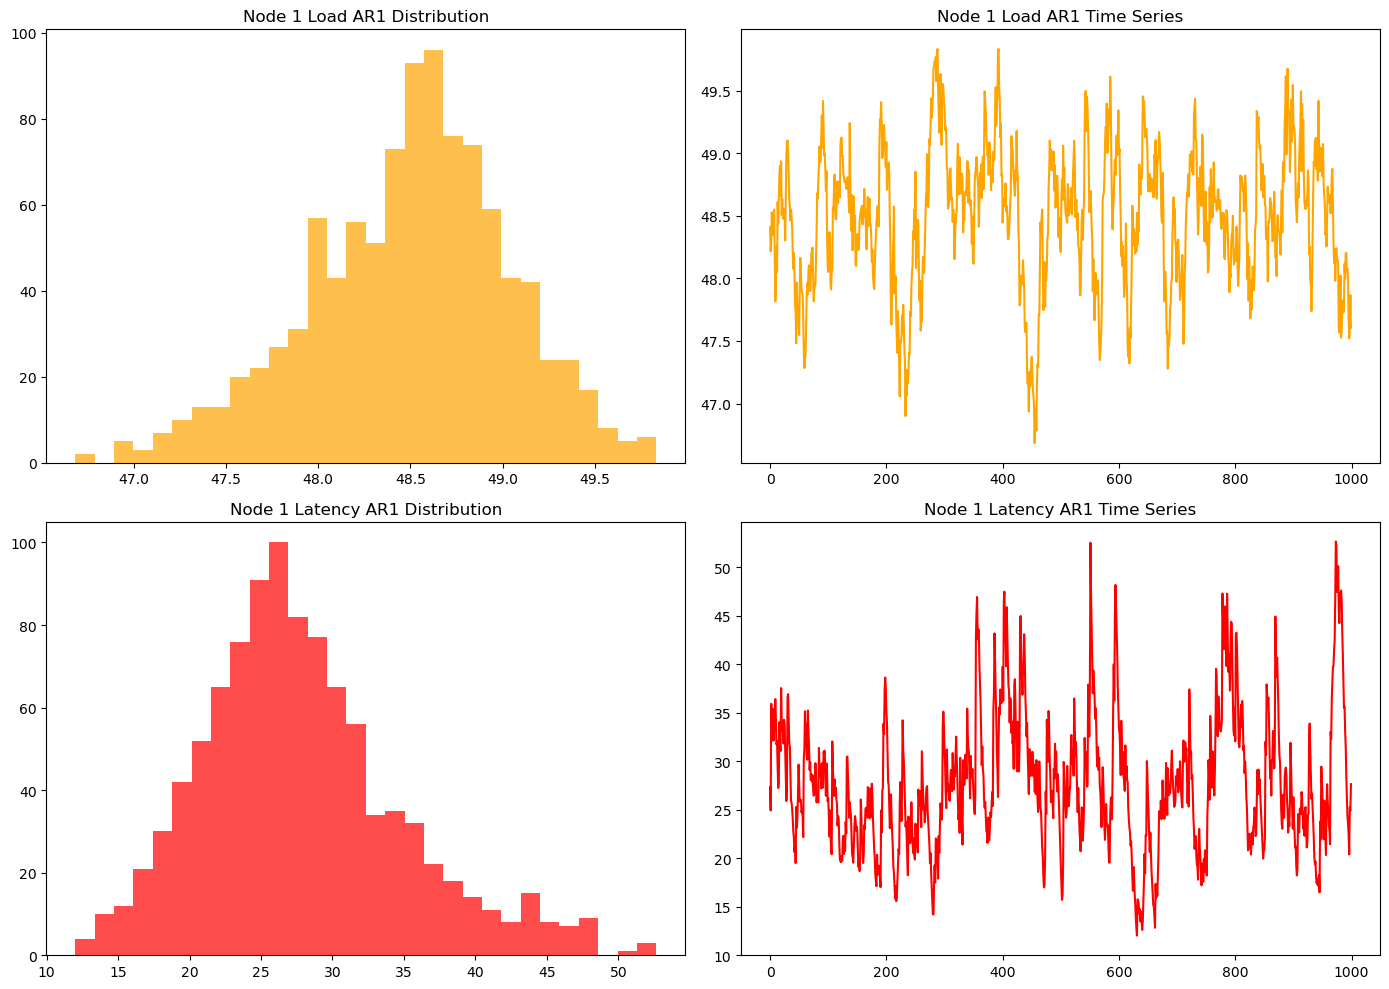

In [16]:
# Updated Figure 2: AR1 Data with histograms and time series plots
def plot_individual_node_ar1(i):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Histogram of AR1 data for load
    axs[0, 0].hist(load_data_ar1[i], bins=30, color='orange', alpha=0.7)
    axs[0, 0].set_title(f"Node {i+1} Load AR1 Distribution")

    # Time series plot of load for the node
    axs[0, 1].plot(load_data_ar1[i], color='orange')
    axs[0, 1].set_title(f"Node {i+1} Load AR1 Time Series")

    # Histogram of AR1 data for latency
    axs[1, 0].hist(latency_data_ar1[i], bins=30, color='red', alpha=0.7)
    axs[1, 0].set_title(f"Node {i+1} Latency AR1 Distribution")

    # Time series plot of latency for the node
    axs[1, 1].plot(latency_data_ar1[i], color='red')
    axs[1, 1].set_title(f"Node {i+1} Latency AR1 Time Series")

    plt.tight_layout()
    plt.savefig(f'Figure_2_ar1_node_{i+1}.png')
    plt.show()

# Example: Plot data for the first node using AR1 method
plot_individual_node_ar1(0)

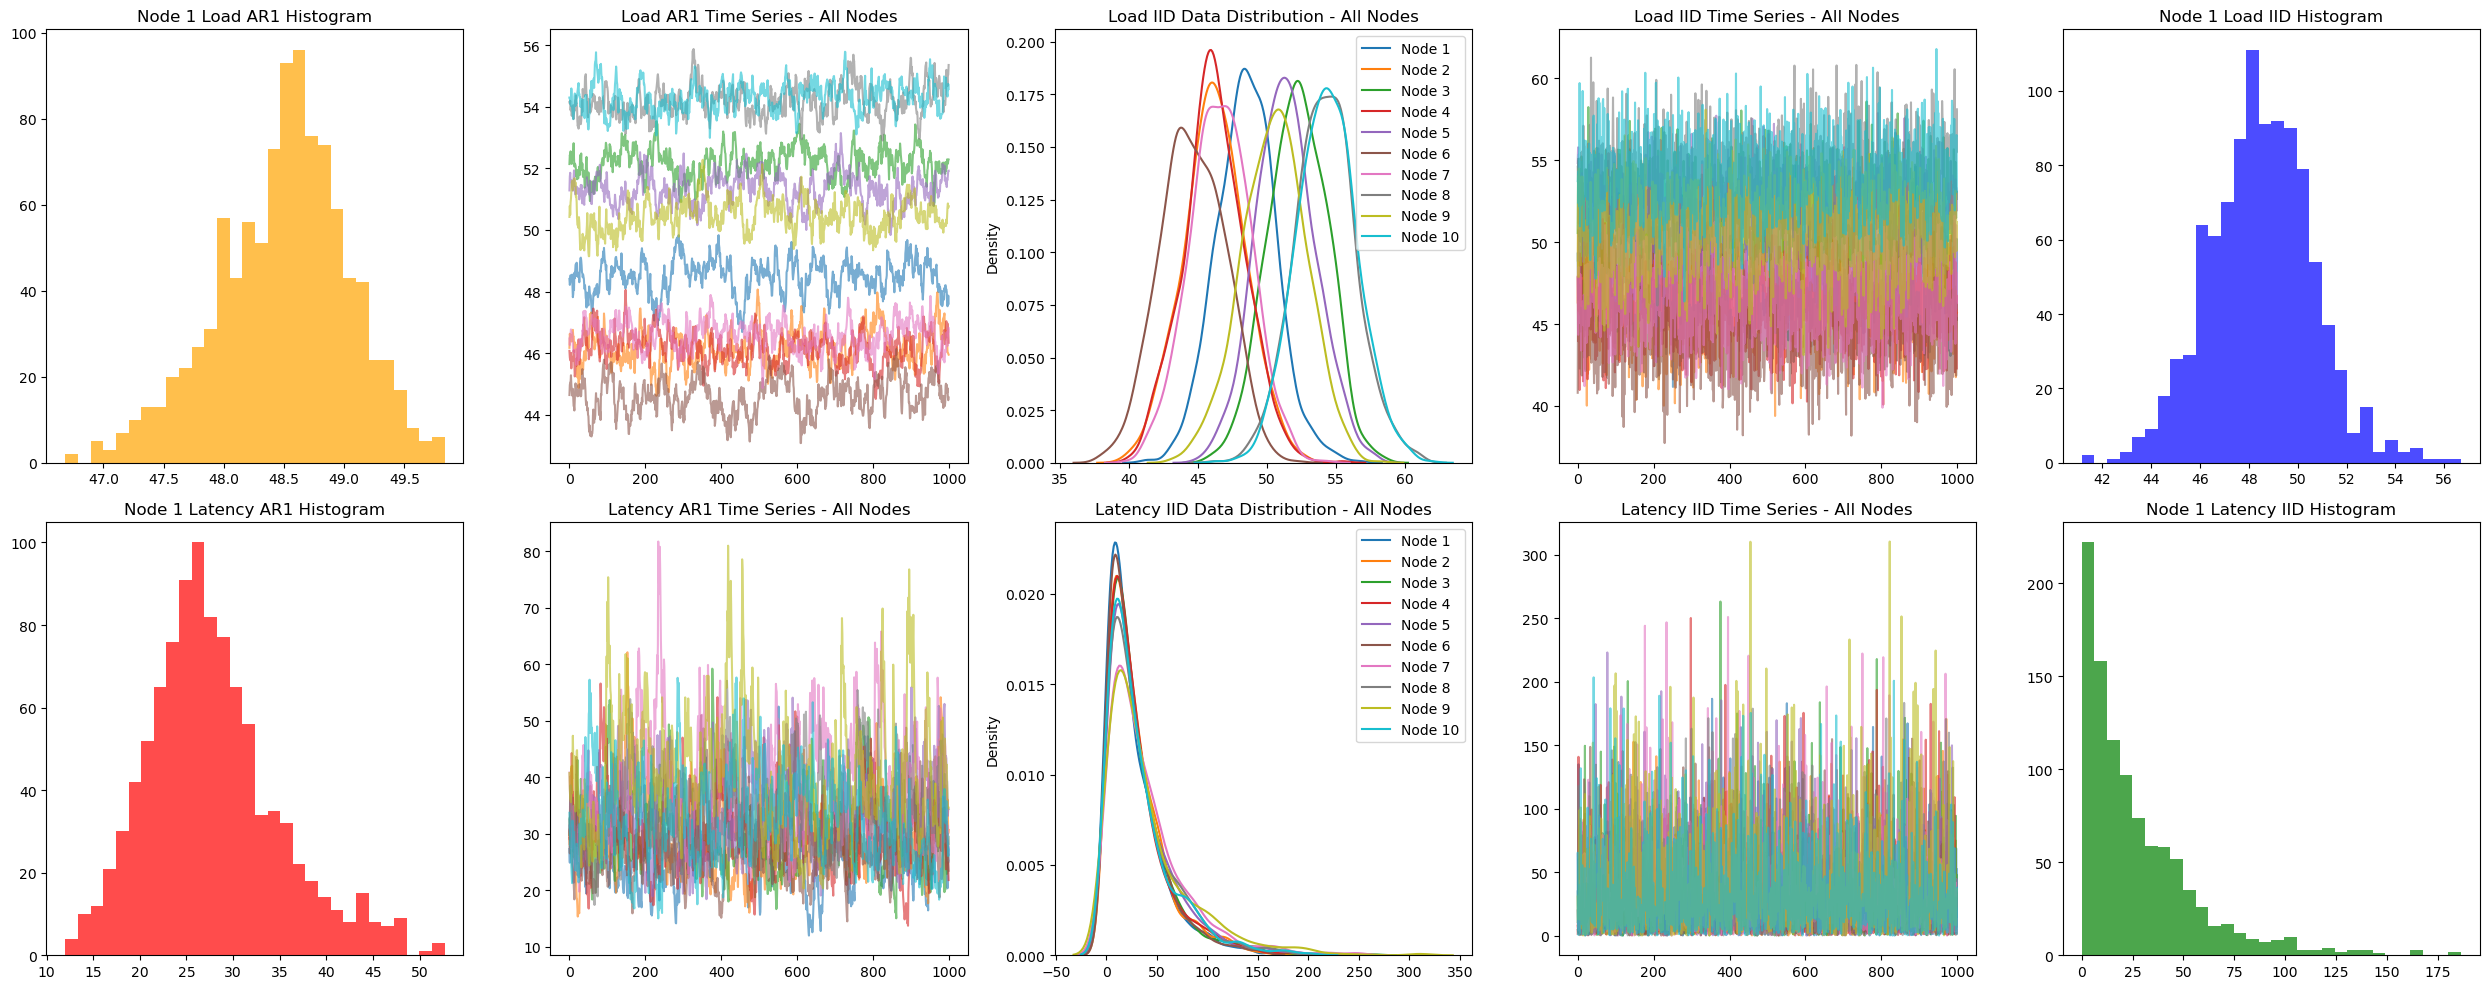

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_data(i, load_data_iid, latency_data_iid, load_data_ar1, latency_data_ar1, N, T):
    """
    Combines and plots the IID and AR1 data for load and latency for all nodes.
    The histograms in the two right columns are only for the i-th node, 
    while the AR1 time series line plots include all nodes.
    
    Parameters:
    i (int): Index of the node to plot histograms for.
    load_data_iid (ndarray): Array of IID load data for all nodes.
    latency_data_iid (ndarray): Array of IID latency data for all nodes.
    load_data_ar1 (ndarray): Array of AR1 load data for all nodes.
    latency_data_ar1 (ndarray): Array of AR1 latency data for all nodes.
    N (int): Number of nodes.
    T (int): Number of data points per node.
    """

    fig, axs = plt.subplots(2, 5, figsize=(25, 10))

    # Histogram of AR1 data for load (leftmost, only for the i-th node)
    axs[0, 0].hist(load_data_ar1[i], bins=30, color='orange', alpha=0.7)
    axs[0, 0].set_title(f"Node {i+1} Load AR1 Histogram")

    # Time series plot of load AR1 for all nodes (next to the histogram)
    axs[0, 1].plot(load_data_ar1.T, alpha=0.6)
    axs[0, 1].set_title("Load AR1 Time Series - All Nodes")

    # Histogram of AR1 data for latency (leftmost, only for the i-th node)
    axs[1, 0].hist(latency_data_ar1[i], bins=30, color='red', alpha=0.7)
    axs[1, 0].set_title(f"Node {i+1} Latency AR1 Histogram")

    # Time series plot of latency AR1 for all nodes (next to the histogram)
    axs[1, 1].plot(latency_data_ar1.T, alpha=0.6)
    axs[1, 1].set_title("Latency AR1 Time Series - All Nodes")

    # KDE plot for each node's load IID data
    for node_index in range(N):
        sns.kdeplot(load_data_iid[node_index], ax=axs[0, 2], label=f'Node {node_index+1}')
    axs[0, 2].set_title("Load IID Data Distribution - All Nodes")
    axs[0, 2].legend()

    # Time series plot of load IID for all nodes
    axs[0, 3].plot(load_data_iid.T, alpha=0.6)
    axs[0, 3].set_title("Load IID Time Series - All Nodes")

    # Histogram of IID data for load (right side, only for the i-th node)
    axs[0, 4].hist(load_data_iid[i], bins=30, color='blue', alpha=0.7)
    axs[0, 4].set_title(f"Node {i+1} Load IID Histogram")

    # KDE plot for each node's latency IID data
    for node_index in range(N):
        sns.kdeplot(latency_data_iid[node_index], ax=axs[1, 2], label=f'Node {node_index+1}')
    axs[1, 2].set_title("Latency IID Data Distribution - All Nodes")
    axs[1, 2].legend()

    # Time series plot of latency IID for all nodes
    axs[1, 3].plot(latency_data_iid.T, alpha=0.6)
    axs[1, 3].set_title("Latency IID Time Series - All Nodes")

    # Histogram of IID data for latency (right side, only for the i-th node)
    axs[1, 4].hist(latency_data_iid[i], bins=30, color='green', alpha=0.7)
    axs[1, 4].set_title(f"Node {i+1} Latency IID Histogram")

    plt.tight_layout()
    # plt.savefig(f'Combined_Figure_Node_{i+1}.png')
    plt.show()

# Example usage
# Assuming load_data_iid, latency_data_iid, load_data_ar1, and latency_data_ar1 are already generated, along with N and T
plot_combined_data(i=0, load_data_iid=load_data_iid, latency_data_iid=latency_data_iid,
                   load_data_ar1=load_data_ar1, latency_data_ar1=latency_data_ar1, N=N, T=T)


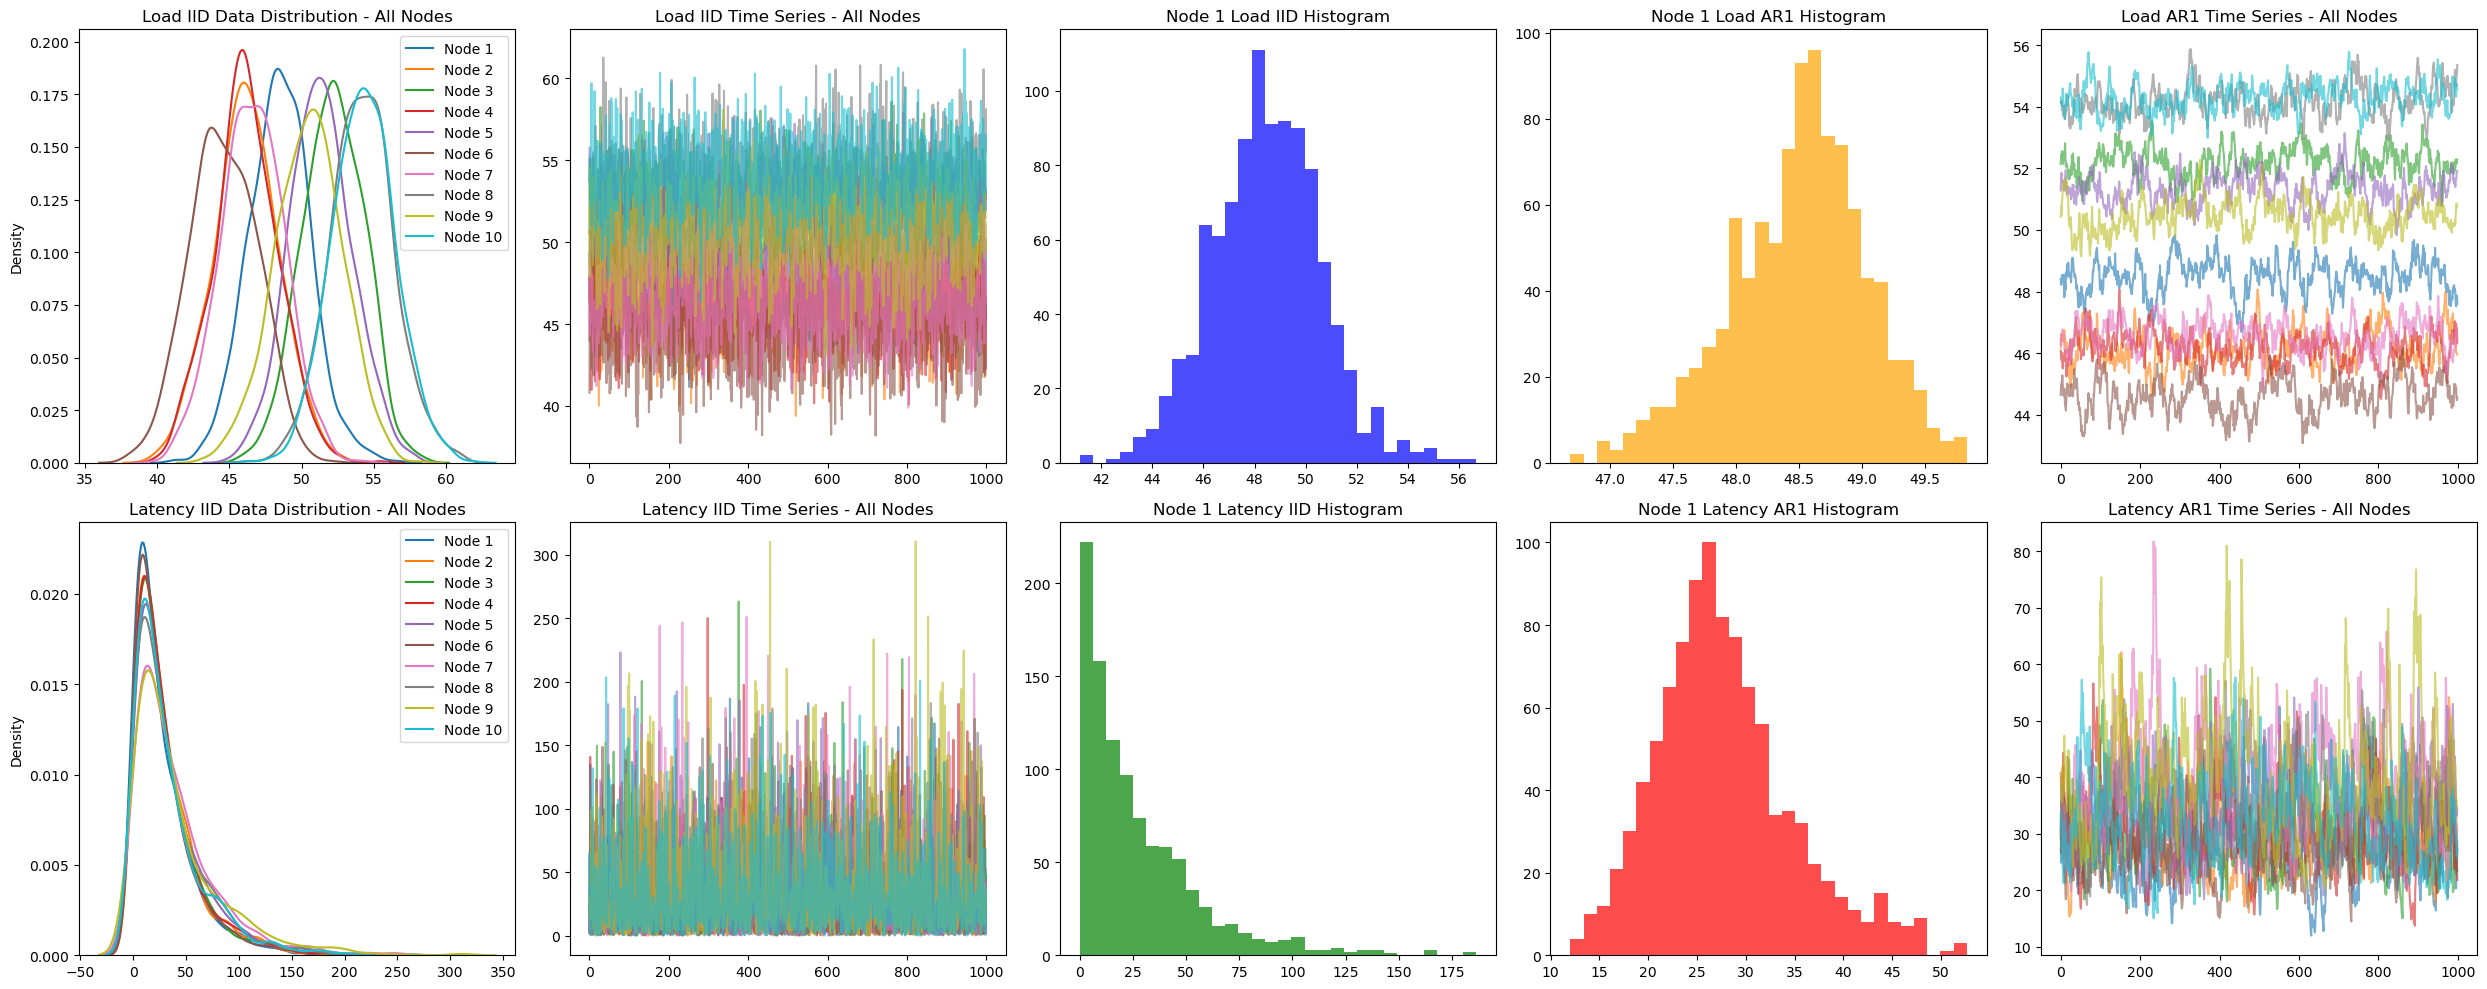

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_data_reordered(i, load_data_iid, latency_data_iid, load_data_ar1, latency_data_ar1, N, T):
    """
    Combines and plots the IID and AR1 data for load and latency for all nodes.
    The histograms in the two right columns are only for the i-th node, 
    while the AR1 time series line plots include all nodes. The column order is rearranged.
    
    Parameters:
    i (int): Index of the node to plot histograms for.
    load_data_iid (ndarray): Array of IID load data for all nodes.
    latency_data_iid (ndarray): Array of IID latency data for all nodes.
    load_data_ar1 (ndarray): Array of AR1 load data for all nodes.
    latency_data_ar1 (ndarray): Array of AR1 latency data for all nodes.
    N (int): Number of nodes.
    T (int): Number of data points per node.
    """

    fig, axs = plt.subplots(2, 5, figsize=(25, 10))

    # Histogram of AR1 data for load (rightmost, only for the i-th node)
    axs[0, 3].hist(load_data_ar1[i], bins=30, color='orange', alpha=0.7)
    axs[0, 3].set_title(f"Node {i+1} Load AR1 Histogram")

    # Time series plot of load AR1 for all nodes (next to the histogram)
    axs[0, 4].plot(load_data_ar1.T, alpha=0.6)
    axs[0, 4].set_title("Load AR1 Time Series - All Nodes")

    # Histogram of AR1 data for latency (rightmost, only for the i-th node)
    axs[1, 3].hist(latency_data_ar1[i], bins=30, color='red', alpha=0.7)
    axs[1, 3].set_title(f"Node {i+1} Latency AR1 Histogram")

    # Time series plot of latency AR1 for all nodes (next to the histogram)
    axs[1, 4].plot(latency_data_ar1.T, alpha=0.6)
    axs[1, 4].set_title("Latency AR1 Time Series - All Nodes")

    # KDE plot for each node's load IID data (left side)
    for node_index in range(N):
        sns.kdeplot(load_data_iid[node_index], ax=axs[0, 0], label=f'Node {node_index+1}')
    axs[0, 0].set_title("Load IID Data Distribution - All Nodes")
    axs[0, 0].legend()

    # Time series plot of load IID for all nodes
    axs[0, 1].plot(load_data_iid.T, alpha=0.6)
    axs[0, 1].set_title("Load IID Time Series - All Nodes")

    # Histogram of IID data for load (middle, only for the i-th node)
    axs[0, 2].hist(load_data_iid[i], bins=30, color='blue', alpha=0.7)
    axs[0, 2].set_title(f"Node {i+1} Load IID Histogram")

    # KDE plot for each node's latency IID data (left side)
    for node_index in range(N):
        sns.kdeplot(latency_data_iid[node_index], ax=axs[1, 0], label=f'Node {node_index+1}')
    axs[1, 0].set_title("Latency IID Data Distribution - All Nodes")
    axs[1, 0].legend()

    # Time series plot of latency IID for all nodes
    axs[1, 1].plot(latency_data_iid.T, alpha=0.6)
    axs[1, 1].set_title("Latency IID Time Series - All Nodes")

    # Histogram of IID data for latency (middle, only for the i-th node)
    axs[1, 2].hist(latency_data_iid[i], bins=30, color='green', alpha=0.7)
    axs[1, 2].set_title(f"Node {i+1} Latency IID Histogram")

    plt.tight_layout()
    plt.savefig(f'Combined_Figure_Reordered_Node_{i+1}.png')
    plt.show()

# Example usage
# Assuming load_data_iid, latency_data_iid, load_data_ar1, and latency_data_ar1 are already generated, along with N and T
plot_combined_data_reordered(i=0, load_data_iid=load_data_iid, latency_data_iid=latency_data_iid,
                             load_data_ar1=load_data_ar1, latency_data_ar1=latency_data_ar1, N=N, T=T)
